# binary classification problem

Task: The dataset provided in 'exercise.csv' represents a binary classification problem of the "Class" variable.

Aim: showcase how you approach a data science problem. (do not focus on the highest classification score)

Requirement: use Python, Pandas and IPython Notebook.

Optional: use of any other libraries.

Completion: send the completed task in .ipynb via shared Google Drive link

Model: to predict "Class" variable based off the features.

Assumption: the location of this .ipynb file is the same as the 'exercise.csv' file

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

C:\Users\KUNAL\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Get the Data
**Read in the exercise.csv file and set it to a data frame called ex_data.**

In [2]:
ex_data = pd.read_csv('exercise.csv')

In [3]:
# verified ex_data is a data frame
type(ex_data)

pandas.core.frame.DataFrame

** Look into the shape and columns of the dataset **

In [4]:
print(ex_data.shape)

(1429, 11)


In [5]:
ex_data.columns

Index(['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4',
       'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9',
       'Class'],
      dtype='object')

In [6]:
print(list(ex_data.columns))

['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Class']


**Check the head of ex_data**

In [7]:
ex_data.head()

Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0   2.810525  18.841566  -9.495653   9.894112  15.189813 -18.097819   
1   2.810525  18.841566  -9.690766   9.922778  15.941171 -18.618056   
2   2.810525  18.841566  -9.690766   9.951443  15.315040 -18.172139   
3   2.810525  18.841566  -9.729789  10.180766  13.060968 -18.097819   
4   2.810525  18.841566  -9.495653   9.922778  13.060968 -19.621369   

   Feature_6  Feature_7  Feature_8  Feature_9  Class  
0 -14.059905 -22.515233  -1.130188  10.065161      1  
1 -11.235948 -22.515233  -0.771228   9.697889      1  
2 -26.313634 -22.515233  -1.273772  10.338428      1  
3 -27.264788 -22.515233  -1.130188  10.417560      0  
4 -34.949402 -22.515233  -0.747297  10.137723      1

** Use info to understand the data types **

In [8]:
ex_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 11 columns):
Feature_0    1410 non-null float64
Feature_1    1421 non-null float64
Feature_2    1415 non-null float64
Feature_3    1421 non-null float64
Feature_4    1418 non-null float64
Feature_5    1406 non-null float64
Feature_6    1418 non-null float64
Feature_7    1410 non-null float64
Feature_8    1419 non-null float64
Feature_9    1415 non-null float64
Class        1429 non-null int64
dtypes: float64(10), int64(1)
memory usage: 122.9 KB


## Data Inspection | Exploratory Data Analysis: Part 1/2

In [9]:
# descriptive statistics that summarize the central tendency, dispersion and shape 
# of a dataset’s distribution, excluding NaN values.

ex_data.describe() 

Feature_0    Feature_1    Feature_2    Feature_3    Feature_4  \
count  1410.000000  1421.000000  1415.000000  1421.000000  1418.000000   
mean      2.761278    18.836509    -9.570223     9.982570    13.792544   
std       0.092740     0.063372     0.226868     0.248747     1.538595   
min       2.140701    18.043017   -10.471220     9.148813     9.178957   
25%       2.741825    18.841566    -9.690766     9.865447    12.810516   
50%       2.810525    18.841566    -9.612721    10.008774    13.687099   
75%       2.810525    18.841566    -9.495653    10.152101    14.688909   
max       2.999449    18.841566    -7.622564    11.413376    20.073634   

         Feature_5    Feature_6    Feature_7    Feature_8    Feature_9  \
count  1406.000000  1418.000000  1410.000000  1419.000000  1415.000000   
mean    -18.587160   -16.879084   -22.516671    -0.934358     9.958484   
std       0.510192     9.431922     0.027776     0.326741     0.427736   
min     -21.330718   -45.823666   -23.147576    -2.135276     8.928247   
25%     -18.803854   -23.464018   -22.515233    -1.106257     9.669022   
50%     -18.432257   -16.835631   -22.515233    -0.890881     9.926164   
75%     -18.246458   -10.522323   -22.515233    -0.699436    10.197245   
max     -17.614742    12.196056   -22.515233    -0.005447    11.643751   

             Class  
count  1429.000000  
mean      0.375787  
std       0.484495  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

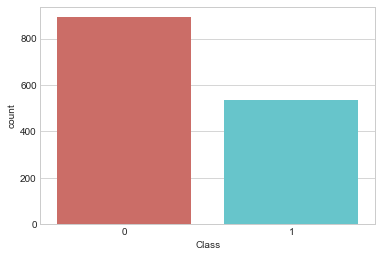

In [10]:
# Barplot for the dependent variable

sns.set_style('whitegrid')
sns.countplot(x='Class',data=ex_data, palette='hls')
plt.show()

In [11]:
# Q:unbalanced label?

ex_data['Class'].value_counts()

# caution over effectiveness of any model chooosen.

0    892
1    537
Name: Class, dtype: int64

In [12]:
# to get a sense of the numbers across the two classes, look at the averages:

ex_data.groupby('Class').mean()

Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
Class                                                                     
0       2.748009  18.835271  -9.560853  10.073158  13.348152 -18.457241   
1       2.783242  18.838570  -9.585824   9.830736  14.525998 -18.803854   

       Feature_6  Feature_7  Feature_8  Feature_9  
Class                                              
0     -16.940381 -22.515667  -0.860690   9.867879  
1     -16.777304 -22.518327  -1.055717  10.108869

In [13]:
# correlation of features with target variable

ex_data.corr()['Class']

Feature_0    0.184145
Feature_1    0.025208
Feature_2   -0.053314
Feature_3   -0.471646
Feature_4    0.371192
Feature_5   -0.328988
Feature_6    0.008377
Feature_7   -0.046426
Feature_8   -0.289484
Feature_9    0.272996
Class        1.000000
Name: Class, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023837D5DEF0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000023838328588>]], dtype=object)

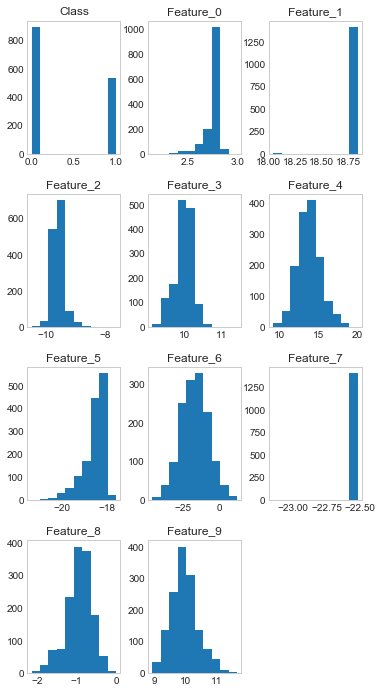

In [14]:
# Visualise the Features via a simple histogram

ex_data.hist(bins=10,figsize=(6,12), grid= False)

## Feature Inspection

Given the above histograms, Feature_1 and Feature_7 may not provide much information in determining the Class, and can potentially be removed from the analysis without incurring much loss of information.

### Feature_1

Text(0.5,0,'Feature_1')

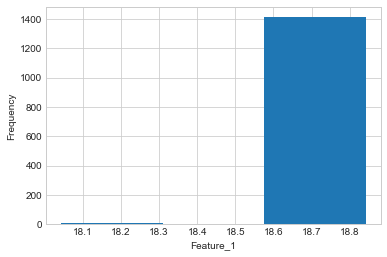

In [15]:
# Create a histogram of the Feature_1

ex_data['Feature_1'].plot.hist(bins=3)
plt.xlabel('Feature_1')

In [16]:
# what values does Feature_1 have?

ex_data['Feature_1'].unique()

array([ 18.84156618,          nan,  18.04301691])

In [17]:
# how many of each value in Feature_1?

pd.value_counts(ex_data['Feature_1'].values, sort=False)

18.043017       9
18.841566    1412
dtype: int64

### Feature_7

Text(0.5,0,'Feature_7')

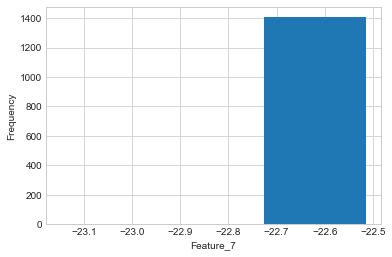

In [18]:
# Create a histogram of the Feature_7

ex_data['Feature_7'].plot.hist(bins=3)
plt.xlabel('Feature_7')

In [19]:
# what values does Feature_7 have?

ex_data['Feature_7'].unique()

array([-22.51523339, -22.89616271,          nan, -23.14757605])

In [20]:
# how many of each value in Feature_7?

pd.value_counts(ex_data['Feature_7'].values, sort=False)

-23.147576       2
-22.515233    1406
-22.896163       2
dtype: int64

## Incomplete Dataset: Check the missing values

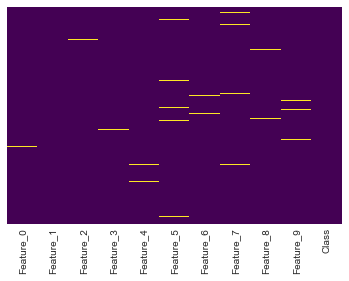

In [21]:
# highlight missing data

sns.heatmap(ex_data.isnull(),yticklabels=False,cbar=False,cmap='viridis') 

In [22]:
# count the missing values in each column

ex_data.isnull().sum()

# ex_data.isnull().sum(axis=0)   within the sum() default is "axis = 0" i.e. by column

# alternatively, could use numpy to provide the same information, np.isnan(ex_data).sum()

Feature_0    19
Feature_1     8
Feature_2    14
Feature_3     8
Feature_4    11
Feature_5    23
Feature_6    11
Feature_7    19
Feature_8    10
Feature_9    14
Class         0
dtype: int64

Text(0.5,1,'Variables with missing values')

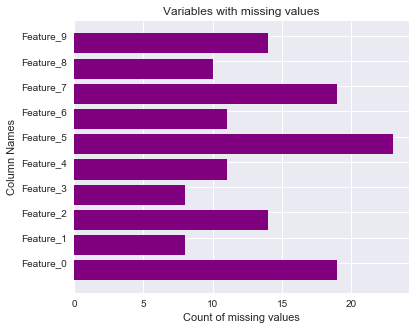

In [23]:
# the list above can be displayed visually in a bar plot, to help understand the relative sizes of the missing data.

sns.set(font_scale=1)

null_columns=ex_data.columns[ex_data.isnull().any()]
labels = []
values = []
for col in null_columns:
    labels.append(col)
    values.append(ex_data[col].isnull().sum())
ind = np.arange(len(labels))
width=0.6
fig, ax = plt.subplots(figsize=(6,5))
rects = ax.barh(ind, np.array(values), color='purple')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values")

In [24]:
# let us have a look at the rows which contain missing values for a specific Feature
# (to reduce output length, we choose Feature_3 as it contains the least missing values)

ex_data[ex_data['Feature_3'].isnull()]

Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
15     2.810525  18.841566  -9.573698        NaN  13.060968 -18.023500   
199    2.776175  18.841566  -9.417608        NaN  14.814135 -20.030126   
213    2.810525  18.841566  -9.807834        NaN  13.311421 -19.435570   
222    2.810525  18.841566  -9.651744        NaN  15.189813 -18.618056   
444    2.810525  18.841566  -9.534676        NaN  14.188004 -19.249772   
727    2.741825  18.841566  -9.768812        NaN  13.186195 -18.915334   
808    2.673125  18.841566  -9.456630        NaN  13.186195 -18.506576   
1159   2.716063  18.841566  -9.651744        NaN  16.567301 -18.729535   

      Feature_6  Feature_7  Feature_8  Feature_9  Class  
15   -31.899841 -22.515233  -0.843020   9.582160      0  
199  -22.146608 -22.515233  -0.747297   9.852395      1  
213  -18.217781 -22.515233  -0.866951   9.815211      1  
222  -12.092212 -22.515233  -1.393425  10.333794      1  
444  -21.651705 -22.515233  -0.938743   9.949023      1  
727   -8.645615 -22.515233  -0.890881   9.921635      1  
808  -25.272338 -22.515233  -0.914812   9.889591      0  
1159 -21.556468 -22.515233  -1.848108  11.288148      1

In [25]:
# we can repeat this for all the Features:

for col in ex_data:
    print(ex_data[ex_data[col].isnull()])

      Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
33          NaN  18.841566  -9.612721  10.008774  14.438456 -19.212612   
129         NaN  18.841566  -9.222494  10.180766  13.812326 -18.543736   
154         NaN  18.841566  -9.690766  10.037439  16.442075 -20.030126   
160         NaN  18.841566  -9.651744   9.980108  13.937552 -18.060659   
183         NaN  18.841566  -9.963925  10.037439  12.810516 -18.506576   
189         NaN  18.841566  -9.768812  10.008774  13.937552 -19.621369   
227         NaN  18.841566  -9.417608  10.094770  16.942980 -18.469417   
255         NaN  18.841566  -9.222494  10.094770  10.556445 -18.580896   
472         NaN  18.841566  -9.729789   9.550128  12.935742 -18.803854   
643         NaN  18.841566  -9.027381   9.865447  14.939361 -18.320778   
660         NaN  18.841566  -9.612721  10.037439  15.315040 -18.729535   
675         NaN  18.841566  -9.417608   9.951443  10.180766 -18.506576   
711         NaN  18.841566  -9.690766 

## What to do about these missing values?

1. ignore them, or
2. imput them (i.e. replace the missing vlaues with an *estimate*)


* How to choose this *estimate*?
    * Mean: the mean of the observed values for that variable
    * Substitution: the value from a new individual who was not selected to be in the sample
    * Hot deck: a randomly chosen value from an individual who has similar values on other variables
    * Cold deck: a systematically chosen value from an individual who has similar values on other variables
    * Regression: the predicted value obtained by regressing the missing variable on other variables
    * Stochastic regression: the predicted value from a regression plus a random residual value.
    * Interpolation and extrapolation: an estimated value from other observations from the same individual.
    * Alternatives to the traditional methods noted above, include machine learning algorithm such as:
        * multilayer perception (MLP)
        * self-organising maps (SOM)
        * decision tree (DT)
        * k-nearest neighbours (KNN)

In [26]:
# we could remove any row that has a missing value
# let use look at how the shape of the data changes if we dropped these

print(ex_data.dropna(how='any').shape)

(1294, 11)


In [27]:
# Removing any row with a missing value, eliminates a "large" proportion of the data set (and may corrupt the interpretation of the analysis of the data)

print("{:.1%}".format((1429-1294)/1429))

9.4%


In [28]:
# instead of 
# removing any row that has a missing value (dataset reduced from 1429 rows to 1294 rows)
# let us count the number of rows with more than one missing value

(ex_data.isnull().sum(axis=1) > 1).sum()

# Explained:
# within the first sum() default is "axis = 0" i.e. by column; here we use "axis = 1" i.e. by row
# the second sum is required to count the number of TRUEs, "(ex_data.isnull().sum(axis=1) > 1)", 
# which represent the number of rows with  more than one missing value

2

In [29]:
# number of rows with more than one missing value is a small proportion of the dataset?

2/1429

# can be removed without little impact on the interpretation  of the analysis of the data

0.0013995801259622112

In [30]:
# let us look at these rows (with more than one missing value)

ex_data[ex_data.isnull().sum(axis=1) > 1]

Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
544    2.776175  18.841566  -9.612721   9.693455  14.563683 -18.580896   
1038   2.810525  18.841566  -9.612721  10.180766        NaN -18.283618   

      Feature_6  Feature_7  Feature_8  Feature_9  Class  
544         NaN -22.515233  -1.465217        NaN      1  
1038 -25.914048        NaN  -1.154119  10.142097      0

In [31]:
# current shape of the data

print(ex_data.shape)

(1429, 11)


In [32]:
# remove any row that has more than one missing value (i.e. the 2 rows noted above)

ex_data = ex_data.dropna(thresh=10)

# Explained:
# df.dropna(thresh=n)
# Threshold specifies how many (n) data points you want to have

In [33]:
# re look at shape to verify that only 2 rows have been removed

print(ex_data.shape)

(1427, 11)


## Imputation

We can now imput the missing values (max one per row) to give us a complete dataset.

In [34]:
# the proportion of the data set missing is small?

ex_data.isnull().sum()/ex_data.sum()

# thus we can imput with mode or mean.

Feature_0    0.004887
Feature_1    0.000299
Feature_2   -0.001035
Feature_3    0.000565
Feature_4    0.000512
Feature_5   -0.000881
Feature_6   -0.000418
Feature_7   -0.000567
Feature_8   -0.007557
Feature_9    0.000923
Class        0.000000
dtype: float64

### traditional statistical imputation: mode [qualitative attribute]

#### Feature_1

In [35]:
# start by looking at the rows with missing values for Feature_1

ex_data[ex_data['Feature_1'].isnull()]

Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
31     2.810525        NaN  -9.651744   9.779451  13.937552 -20.847641   
37     2.776175        NaN  -9.807834  10.180766  13.186195 -18.283618   
239    2.647363        NaN  -9.651744   9.836782  16.066397 -19.509890   
250    2.681713        NaN  -9.573698  10.152101  14.313230 -18.432257   
287    2.810525        NaN  -9.495653   9.779451  13.311421 -18.320778   
635    2.810525        NaN  -9.612721  10.066105  14.188004 -18.989653   
1140   2.733237        NaN  -9.495653  10.008774  13.311421 -17.986340   
1218   2.810525        NaN  -9.573698  10.180766  11.433028 -18.172139   

      Feature_6  Feature_7  Feature_8  Feature_9  Class  
31   -21.467213 -22.515233  -0.962673  10.041769      1  
37   -13.795546 -22.515233  -0.699436   9.548994      0  
239  -17.212612 -22.515233  -0.795159   9.672484      1  
250   -3.564234 -22.515233  -1.058396  10.158878      0  
287  -27.359130 -22.515233  -0.603713   9.620469      1  
635  -28.828174 -22.515233  -0.795159   9.437069      1  
1140 -10.790689 -22.515233  -1.178049  10.217162      0  
1218 -23.215422 -22.515233  -0.484060   9.275948      0

In [36]:
# look again at the potential values of Feature_1

pd.value_counts(ex_data['Feature_1'].values, sort=True)

18.841566    1410
18.043017       9
dtype: int64

In [37]:
# majority of Feature_1 has the mode?

1410/(1410+9)

0.9936575052854123

In [38]:
# store the mode:

mode_Feature_1 = pd.value_counts(ex_data['Feature_1'].values, sort=True).index[0]

In [39]:
# can have a look at the mode:

mode_Feature_1

18.841566182200001

In [40]:
# we can populate these missing values with the mode (99.4% of Feature_1)
# (we noted earlier that this feature only has 2 potential values in the dataset provided)

ex_data["Feature_1"] = ex_data["Feature_1"].fillna(mode_Feature_1)

In [41]:
# verify that Feature_1 has no missing values remaining

ex_data[ex_data['Feature_1'].isnull()]

Empty DataFrame
Columns: [Feature_0, Feature_1, Feature_2, Feature_3, Feature_4, Feature_5, Feature_6, Feature_7, Feature_8, Feature_9, Class]
Index: []

In [42]:
# verify that the potential values of Feature_1 has not changed

pd.value_counts(ex_data['Feature_1'].values, sort=True)

18.841566    1418
18.043017       9
dtype: int64

#### Feature_7

In [43]:
# secondly, look at the rows with missing values for Feature_7

ex_data[ex_data['Feature_7'].isnull()]

Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
17     2.776175  18.841566  -9.612721  10.094770  13.436647 -18.023500   
39     2.810525  18.841566  -9.690766  10.066105  14.188004 -18.878174   
87     2.724650  18.841566  -9.690766  10.037439  13.436647 -19.138292   
118    2.810525  18.841566  -9.651744  10.123435  14.188004 -19.324091   
401    2.810525  18.841566  -9.729789  10.152101  13.060968 -18.320778   
527    2.767587  18.841566  -9.690766  10.094770  12.184385 -18.655215   
571    2.810525  18.841566  -9.768812   9.836782  14.939361 -18.469417   
631    2.810525  18.841566  -9.729789   9.894112  14.939361 -19.435570   
802    2.681713  18.841566  -9.495653   9.980108  12.434838 -18.172139   
845    2.767587  18.841566  -9.417608   9.922778  12.935742 -18.209298   
902    2.862050  18.841566  -9.105426  10.094770  11.683481 -18.989653   
948    2.810525  18.841566  -9.651744   9.980108  13.060968 -18.580896   
961    2.810525  18.841566  -9.378585  10.209431  13.311421 -18.209298   
1179   2.733237  18.841566  -9.300540   9.865447  11.182576 -17.614742   
1223   2.707475  18.841566  -9.495653  10.037439  11.558254 -18.283618   
1234   2.784762  18.841566  -9.612721  10.066105  13.311421 -18.060659   
1354   2.810525  18.841566  -9.378585   9.664790  13.186195 -18.134979   
1421   2.810525  18.841566  -9.573698  10.094770  13.561873 -18.543736   

      Feature_6  Feature_7  Feature_8  Feature_9  Class  
17   -11.195452        NaN  -1.130188  10.044390      0  
39    -6.762836        NaN  -1.106257   9.988680      1  
87   -12.953056        NaN  -0.747297   9.662871      0  
118  -30.163538        NaN  -1.058396  10.422964      1  
401  -19.408853        NaN  -1.082327  10.306851      0  
527   -3.937922        NaN  -0.531921   9.561871      0  
571   -1.525689        NaN  -1.178049  10.196671      1  
631  -27.154024        NaN  -1.201980  10.218345      1  
802  -17.624419        NaN  -1.369494  10.382504      0  
845  -27.480322        NaN  -0.866951   9.802807      0  
902  -11.889029        NaN  -0.771228   9.895569      0  
948  -41.531849        NaN  -1.130188  10.283580      0  
961  -32.256791        NaN  -0.890881   9.876089      0  
1179 -14.590796        NaN  -0.292615   9.080118      0  
1223 -19.169126        NaN  -0.507991   9.723606      0  
1234  -8.202817        NaN  -0.866951   9.841508      0  
1354  -0.237007        NaN  -0.507991   9.481607      1  
1421 -18.228592        NaN  -1.201980  10.602680      0

In [44]:
# look again at the potential values of Feature_7

pd.value_counts(ex_data['Feature_7'].values, sort=True)

-22.515233    1405
-22.896163       2
-23.147576       2
dtype: int64

In [45]:
# majority of Feature_7 has the mode?

1405/(1405+2+2)

0.9971611071682044

In [46]:
# store the mode:

mode_Feature_7 = pd.value_counts(ex_data['Feature_7'].values, sort=True).index[0]

In [47]:
# can have a look at the mode:

mode_Feature_7

-22.515233394399999

In [48]:
# we can populate these missing values with the mode (99.7% of Feature_1)
# (we noted earlier that this feature only has 3 potential values in the dataset provided)

ex_data["Feature_7"] = ex_data["Feature_7"].fillna(mode_Feature_7)

In [49]:
# verify that Feature_7 has no missing values remaining

ex_data[ex_data['Feature_7'].isnull()]

Empty DataFrame
Columns: [Feature_0, Feature_1, Feature_2, Feature_3, Feature_4, Feature_5, Feature_6, Feature_7, Feature_8, Feature_9, Class]
Index: []

In [50]:
# verify that the potential values of Feature_7 has not changed

pd.value_counts(ex_data['Feature_7'].values, sort=True)

-22.515233    1423
-22.896163       2
-23.147576       2
dtype: int64

### traditional statistical imputation: mean [quantitative attribute]

In [51]:
# let us look at the potential number of unique values of the dataset before we look to fill in the remaining missing values

for col in ex_data:
    print(col, len(ex_data[col].unique()))

Feature_0 69
Feature_1 2
Feature_2 49
Feature_3 54
Feature_4 78
Feature_5 78
Feature_6 1418
Feature_7 3
Feature_8 82
Feature_9 1415
Class 2


In [52]:
# Fill in missing values for the features with each Class’s mean value of each Feature

for col in ex_data:
    ex_data[col].fillna(ex_data.groupby("Class")[col].transform("mean"), inplace = True)

In [53]:
# double check that all missing values are populated

ex_data.isnull().sum()

Feature_0    0
Feature_1    0
Feature_2    0
Feature_3    0
Feature_4    0
Feature_5    0
Feature_6    0
Feature_7    0
Feature_8    0
Feature_9    0
Class        0
dtype: int64

## Data Inspection | Exploratory Data Analysis: Part 2/2

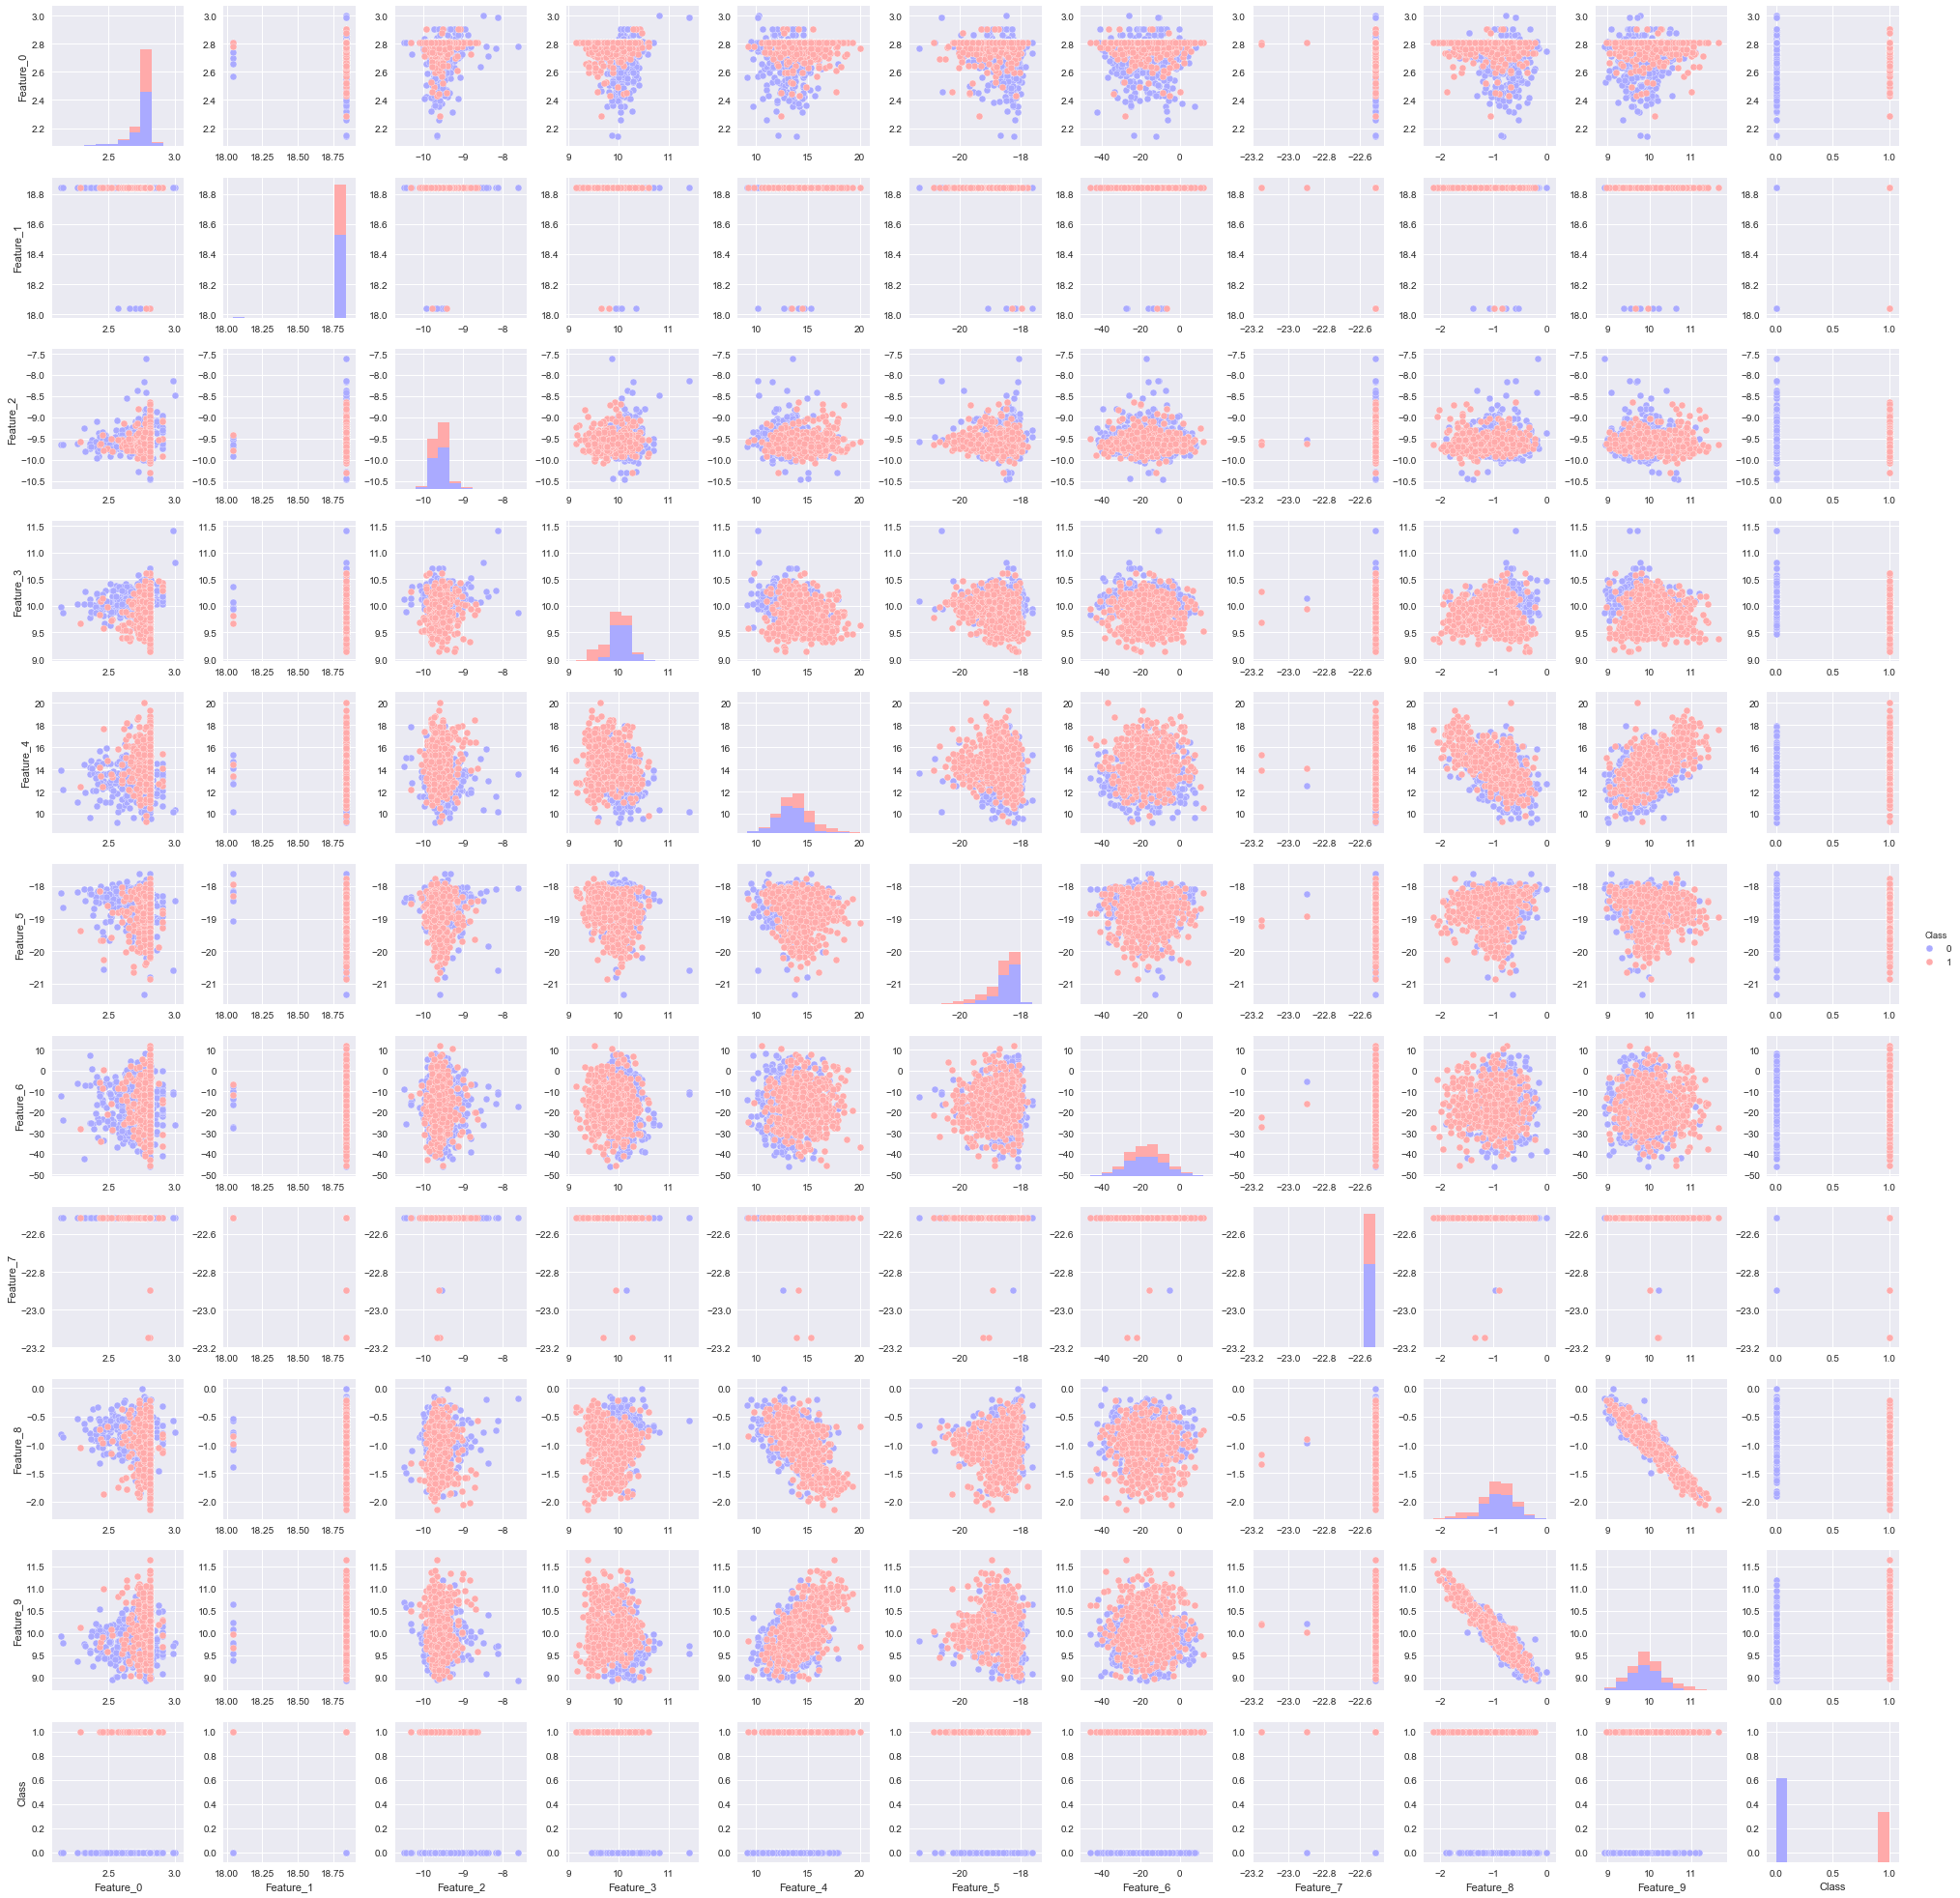

In [54]:
# Visualise the Features via a pairplot with the hue defined by the 'Class' column feature

sns.pairplot(ex_data,hue='Class',palette='bwr')

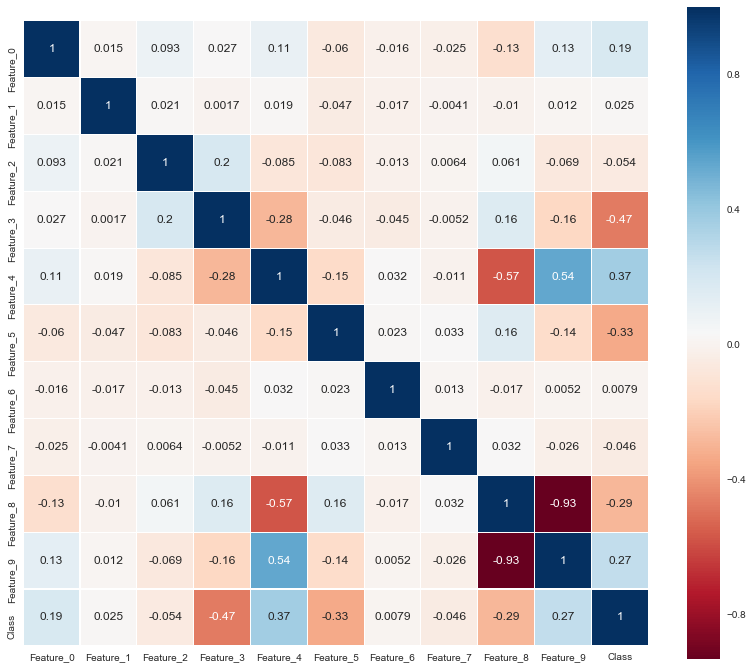

In [55]:
# Check the independence between the independent variables

plt.figure(figsize=(14,12))
sns.heatmap(ex_data.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)
plt.show()

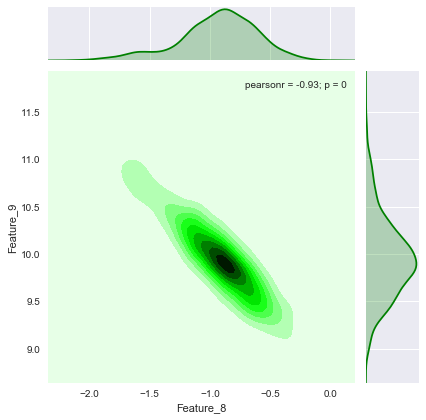

In [56]:
# The above Pearson Correlation plot confirms that there are not too many features strongly correlated with one another.

# Therefore, we can conclude that there is not much redundant or superfluous data

# The two most correlated features are Feature_8 and Feature_9. We can produce some plots to look into these.

sns.jointplot(x='Feature_8', y='Feature_9', data=ex_data, color='green', kind = 'kde')

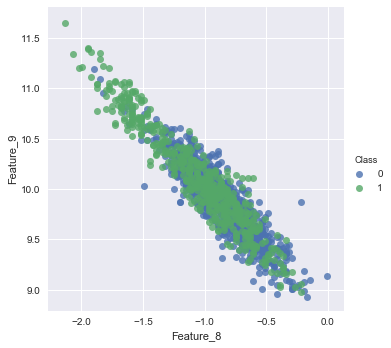

In [57]:
# Show the split across the Class

sns.lmplot(x='Feature_8', y='Feature_9', hue='Class', data=ex_data, fit_reg=False)

In [58]:
# ignoring one of the above two features (Feature_8 or Feature_9)
# may help reduce the dimensionality of this classification problem

# Predictive modelling algorithms

- type of problem: classification and regression

- type of machine learning: [supervised learning](http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html) (as we are training our model with a given dataset)

Choice of Models:

* Logistic Regression
* KNN or k-Nearest Neighbors
* Support Vector Machines
* Naive Bayes classifier
* Decision Tree
* Random Forrest

## Standarise features

The histograms above show that the features are measured on different scales.

Some of the modelling algorithms below require Feature Scaling prior to modelling. (not necessary for tree based algorithms)

In [59]:
scaler = StandardScaler()
scaler.fit(ex_data.drop('Class',axis=1))

# Use the .transform() method to transform the features to a scaled version
scaled_features = scaler.transform(ex_data.drop('Class',axis=1)) 

# Convert the scaled features to a dataframe
scaled_ex_data = pd.DataFrame(scaled_features,columns=ex_data.columns[:-1]) 

# check the head of this dataframe to make sure the scaling worked
scaled_ex_data.head() 

Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0   0.535151   0.079668   0.329998  -0.354623   0.912373   0.966920   
1   0.535151   0.079668  -0.533985  -0.239121   1.402283  -0.059881   
2   0.535151   0.079668  -0.533985  -0.123618   0.994025   0.820234   
3   0.535151   0.079668  -0.706782   0.800400  -0.475705   0.966920   
4   0.535151   0.079668   0.329998  -0.239121  -0.475705  -2.040140   

   Feature_6  Feature_7  Feature_8  Feature_9  
0   0.299378   0.051454  -0.604566   0.251137  
1   0.599934   0.051454   0.498498  -0.611223  
2  -1.004797   0.051454  -1.045791   0.892774  
3  -1.106029   0.051454  -0.604566   1.078576  
4  -1.923909   0.051454   0.572036   0.421513

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023841303748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002384183E160>]], dtype=object)

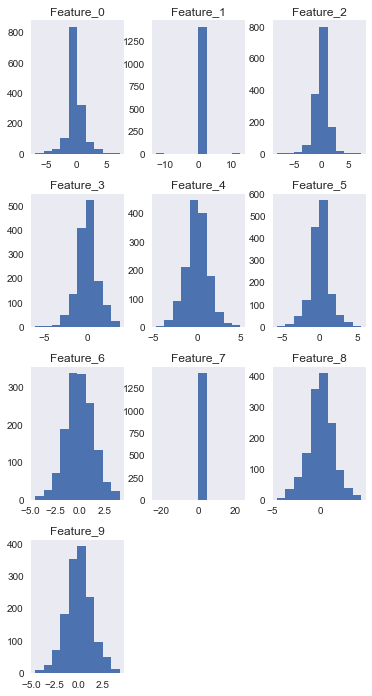

In [60]:
# Visualise the Standarised Features via a simple histogram

scaled_ex_data.diff().hist(bins=10,figsize=(6,12), grid= False)

# It should be noted that the scikit-learn applies parameter regularization - as noted in the scikit-learn documentation: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# Model: Logistic Regression

Logistic regression measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic function. See [Wikipedia - Logistic_regression](https://en.wikipedia.org/wiki/Logistic_regression)

## Model 1: Logistic Regression with All Features

In [61]:
X = ex_data[['Feature_0','Feature_1','Feature_2','Feature_3','Feature_4','Feature_5','Feature_6','Feature_7','Feature_8','Feature_9']]
y = ex_data['Class']

In [62]:
print(X.shape)
print(y.shape)

(1427, 10)
(1427,)


** Split the data into training set and testing set using train_test_split**

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [64]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(956, 10)
(471, 10)
(956,)
(471,)


** Train and fit a logistic regression model on the training set.**

In [65]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Predictions and Evaluations
** Now predict values for the testing data.**

In [66]:
predictions = logmodel.predict(X_test)

** Calculate the accuracy of the model on the test dataset.**

In [67]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.82      0.90      0.86       297
          1       0.80      0.67      0.73       174

avg / total       0.82      0.82      0.81       471



In [68]:
print(confusion_matrix(y_test,predictions))

[[268  29]
 [ 57 117]]


In [69]:
# The result is telling us that we have 268 + 117 correct predictions and 57 + 29 incorrect predictions
model_01 = "Logistic Regression with All Features"
model_01_acc = logmodel.score(X_test, y_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model_01_acc))

Accuracy of logistic regression classifier on test set: 0.82


### Model 1s: Logistic Regression with All Features (scaled)

In [70]:
X = scaled_ex_data[['Feature_0','Feature_1','Feature_2','Feature_3','Feature_4','Feature_5','Feature_6','Feature_7','Feature_8','Feature_9']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101) # from sklearn.model_selection
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
model_01s = "Logistic Regression with All Features (scaled)"
model_01s_acc = logmodel.score(X_test, y_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model_01s_acc))

Accuracy of logistic regression classifier on test set: 0.83


### Model 2: Selected training features: drop Feature_1, Feature_7

In [71]:
# ex_data.drop(['Feature_1','Feature_7'],axis=1,inplace=True)

In [72]:
X = ex_data[['Feature_0', 'Feature_2', 'Feature_3','Feature_4','Feature_5','Feature_6','Feature_8','Feature_9']]
y = ex_data['Class']

In [73]:
print(X.shape)
print(y.shape)

(1427, 8)
(1427,)


** Split the data into training set and testing set using train_test_split**

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [75]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(956, 8)
(471, 8)
(956,)
(471,)


** Train and fit a logistic regression model on the training set.**

In [76]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Predictions and Evaluations
** Now predict values for the testing data.**

In [77]:
predictions = logmodel.predict(X_test)

** Calculate the accuracy of the model on the test dataset.**

In [78]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.82      0.90      0.86       297
          1       0.79      0.67      0.72       174

avg / total       0.81      0.81      0.81       471



In [79]:
print(confusion_matrix(y_test,predictions))

[[267  30]
 [ 58 116]]


In [80]:
# The result is telling us that we have 267 + 116 correct predictions and 58 + 30 incorrect predictions

model_02 = "Logistic Regression: Selected training features: drop Feature_1, Feature_7"
model_02_acc = logmodel.score(X_test, y_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model_02_acc))

Accuracy of logistic regression classifier on test set: 0.81


### Model 2s: Logistic Regression with All Features (scaled)

In [81]:
X = scaled_ex_data[['Feature_0','Feature_2','Feature_3','Feature_4','Feature_5','Feature_6','Feature_8','Feature_9']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
model_02s = "Logistic Regression: Selected training features: drop Feature_1, Feature_7 (scaled)"
model_02s_acc = logmodel.score(X_test, y_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model_02s_acc))

Accuracy of logistic regression classifier on test set: 0.82


### Model 3: Selected training features: only keep Feature_4, Feature_8, Feature_9

In [82]:
# look again at the mean grouped by Class

ex_data.groupby('Class').mean()

Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
Class                                                                     
0       2.747938  18.835293  -9.560794  10.073037  13.348152 -18.457439   
1       2.783255  18.838587  -9.585773   9.830995  14.525927 -18.804278   

       Feature_6  Feature_7  Feature_8  Feature_9  
Class                                              
0     -16.930230 -22.515661  -0.860357   9.867568  
1     -16.777304 -22.518304  -1.054952  10.108869

In [83]:
# Compare these numbers between the two groups

ex_data.groupby('Class').mean().diff()

Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
Class                                                                     
0            NaN        NaN        NaN        NaN        NaN        NaN   
1       0.035318   0.003294  -0.024979  -0.242042   1.177775  -0.346839   

       Feature_6  Feature_7  Feature_8  Feature_9  
Class                                              
0            NaN        NaN        NaN        NaN  
1       0.152926  -0.002643  -0.194594   0.241301

In [84]:
# Note where the difference is larger than 5%

((ex_data.groupby('Class').mean().diff()/ex_data.mean())[1:2] > 0.05)

Class  Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  \
Class                                                                 
1      False      False      False      False      False       True   

       Feature_5  Feature_6  Feature_7  Feature_8  Feature_9  
Class                                                         
1          False      False      False       True      False

In [85]:
# ex_data.drop(['Feature_0', 'Feature_2', 'Feature_3','Feature_5','Feature_6'],axis=1,inplace=True)

In [86]:
X = ex_data[['Feature_4','Feature_8','Feature_9']]
y = ex_data['Class']

In [87]:
print(X.shape)
print(y.shape)

(1427, 3)
(1427,)


** Split the data into training set and testing set using train_test_split**

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [89]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(956, 3)
(471, 3)
(956,)
(471,)


** Train and fit a logistic regression model on the training set.**

In [90]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Predictions and Evaluations
** Now predict values for the testing data.**

In [91]:
predictions = logmodel.predict(X_test)

** Calculate the accuracy of the model on the test dataset.**

In [92]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.71      0.88      0.78       297
          1       0.65      0.39      0.48       174

avg / total       0.69      0.70      0.67       471



In [93]:
print(confusion_matrix(y_test,predictions)) # from sklearn.metrics

[[261  36]
 [107  67]]


In [94]:
# The result is telling us that we have 261 + 67 correct predictions and 107 + 36 incorrect predictions

model_03 = "Logistic Regression: Selected training features: only keep Feature_4, Feature_8, Feature_9"
model_03_acc = logmodel.score(X_test, y_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model_03_acc))

Accuracy of logistic regression classifier on test set: 0.70


### Model 4: Feature Selection: Recursive Feature Elimination

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [95]:
X = ex_data[['Feature_0','Feature_1','Feature_2','Feature_3','Feature_4','Feature_5','Feature_6','Feature_7','Feature_8','Feature_9']]
y = ex_data['Class']

In [96]:
rfe = RFE(logmodel)
rfe = rfe.fit(X, y)
print(rfe.support_)

[ True False False  True  True  True False False  True False]


In [97]:
X = ex_data[['Feature_0','Feature_3','Feature_4','Feature_5','Feature_8']]
y = ex_data['Class']

In [98]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.404926
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                 1427
Model:                          Logit   Df Residuals:                     1422
Method:                           MLE   Df Model:                            4
Date:                Wed, 21 Mar 2018   Pseudo R-squ.:                  0.3882
Time:                        16:45:22   Log-Likelihood:                -577.83
converged:                       True   LL-Null:                       -944.50
                                        LLR p-value:                2.108e-157
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Feature_0      6.9845      0.930      7.508      0.000       5.161       8.808
Feature_3     -6.0702      0.

The p-values for most of the variables are smaller than 0.05, therefore, most of them are significant to the model.

** Split the data into training set and testing set using train_test_split**

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [100]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(956, 5)
(471, 5)
(956,)
(471,)


** Train and fit a logistic regression model on the training set.**

In [101]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Predictions and Evaluations
** Now predict values for the testing data.**

In [102]:
predictions = logmodel.predict(X_test)

** Calculate the accuracy of the model on the test dataset.**

In [103]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.82      0.90      0.86       297
          1       0.80      0.67      0.73       174

avg / total       0.81      0.82      0.81       471



In [104]:
print(confusion_matrix(y_test,predictions))

[[268  29]
 [ 58 116]]


In [105]:
# The result is telling us that we have 268 + 116 correct predictions and 58 + 29 incorrect predictions

model_04 = "Logistic Regression: Feature Selection: Recursive Feature Elimination (RFE)"
model_04_acc = logmodel.score(X_test, y_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model_04_acc))

Accuracy of logistic regression classifier on test set: 0.82


## Model 5: k-Nearest Neighbors

An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. See [Wikipedia - K-nearest_neighbors_algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

In [106]:
X = ex_data[['Feature_0','Feature_1','Feature_2','Feature_3','Feature_4','Feature_5','Feature_6','Feature_7','Feature_8','Feature_9']]
y = ex_data['Class']

In [107]:
knn = KNeighborsClassifier(n_neighbors=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
model_05 = "k-Nearest Neighbors"
model_05_acc = knn.score(X_test, y_test)
print('Accuracy of k-Nearest Neighbors classifier on test set: {:.2f}'.format(model_05_acc))

Accuracy of k-Nearest Neighbors classifier on test set: 0.73


### Choosing a K Value

Text(0,0.5,'Accuracy Score')

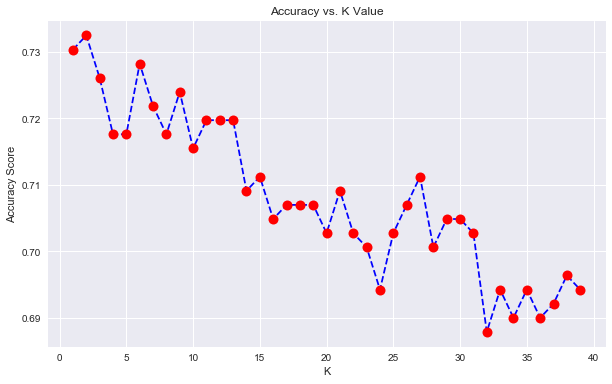

In [108]:
accuracy_score = [] # empty list

# may take some time to run
for i in range(1,40): # many different k values
    
    knn = KNeighborsClassifier(n_neighbors=i) # many different model
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    accuracy_score.append(knn.score(X_test, y_test)) # append (new item) to the list

plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_score,
         color='blue', 
         linestyle='dashed', 
         marker='o',
         markerfacecolor='red',
         markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Score')

In [109]:
# retrain the model with k=1 and check the classification report
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.77      0.81      0.79       297
          1       0.65      0.60      0.62       174

avg / total       0.73      0.73      0.73       471



In [110]:
# based on the plot above for Accuracy Score for K > 9
# retrain the model with k=9 and check the classification report
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.72      0.91      0.81       297
          1       0.72      0.41      0.52       174

avg / total       0.72      0.72      0.70       471



In [111]:
## Model 5: k-Nearest Neighbors (scaled)

In [112]:
# Because the KNN classifier 
# predicts the class of a given test observation 
# by identifying the observations that are nearest to it,
# the scale of the variables matters. 

# Any variables that are on a large scale will have a 
# much larger effect on the distance between the observations,
# hence on the KNN classifier, 
# than variables that are on a small scale.

In [113]:
X = scaled_ex_data[['Feature_0','Feature_1','Feature_2','Feature_3','Feature_4','Feature_5','Feature_6','Feature_7','Feature_8','Feature_9']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
model_05s = "k-Nearest Neighbors (scaled)"
model_05s_acc = knn.score(X_test, y_test)
print('Accuracy of k-Nearest Neighbors classifier on test set: {:.2f}'.format(model_05s_acc))

Accuracy of k-Nearest Neighbors classifier on test set: 0.84


### Choosing a K Value

Text(0,0.5,'Accuracy Score')

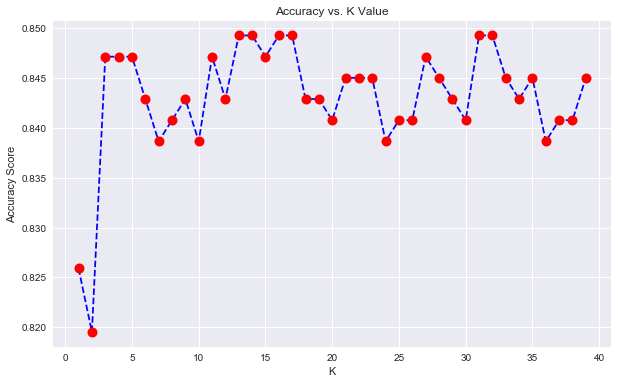

In [114]:
accuracy_score = [] # empty list

# may take some time to run
for i in range(1,40): # many different k values
    
    knn = KNeighborsClassifier(n_neighbors=i) # many different model
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    accuracy_score.append(knn.score(X_test, y_test)) # append (new item) to the list

plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_score,
         color='blue', 
         linestyle='dashed', 
         marker='o',
         markerfacecolor='red',
         markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Score')

In [115]:
# retrain the model with k=1 and check the classification report
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.85      0.88      0.86       297
          1       0.78      0.74      0.76       174

avg / total       0.82      0.83      0.82       471



In [116]:
# based on the plot above for Accuracy Score for K > 5
# retrain the model with k=5 and check the classification report
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.86      0.91      0.88       297
          1       0.82      0.75      0.78       174

avg / total       0.85      0.85      0.85       471



## Model 6: Support Vector Classification

Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.  See [Wikipedia - Support_vector_machine](https://en.wikipedia.org/wiki/Support_vector_machine)

In [117]:
svc = SVC(kernel="linear", C=1)

rfe = RFE(estimator=svc)
X = ex_data[['Feature_0','Feature_1','Feature_2','Feature_3','Feature_4','Feature_5','Feature_6','Feature_7','Feature_8','Feature_9']]
rfe.fit(X, y)
print(rfe.support_)

[ True False False  True False  True False  True  True False]


In [118]:
X = ex_data[['Feature_0','Feature_3','Feature_5','Feature_7','Feature_8']]
y = ex_data['Class']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
svc.fit(X_train,y_train)
predictions = svc.predict(X_test)
model_06 = "Support Vector Classification: Feature Selection: Recursive Feature Elimination (RFE)"
model_06_acc = svc.score(X_test, y_test)
print('Accuracy of Support Vector Classification classifier on test set: {:.2f}'.format(model_06_acc))

Accuracy of Support Vector Classification classifier on test set: 0.82


### Model 6s: Support Vector Classification (scaled)

In [120]:
rfe = RFE(estimator=svc)
X = scaled_ex_data[['Feature_0','Feature_1','Feature_2','Feature_3','Feature_4','Feature_5','Feature_6','Feature_7','Feature_8','Feature_9']]
rfe.fit(X, y)
print(rfe.support_)

[ True False False  True  True  True False False  True False]


In [121]:
X = scaled_ex_data[['Feature_3','Feature_4','Feature_5','Feature_7','Feature_8']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
svc.fit(X_train,y_train)
predictions = svc.predict(X_test)
model_06s = "Support Vector Classification: Feature Selection: Recursive Feature Elimination (RFE) (scaled)"
model_06s_acc = svc.score(X_test, y_test)
print('Accuracy of Support Vector Classification classifier on test set: {:.2f}'.format(model_06s_acc))

Accuracy of Support Vector Classification classifier on test set: 0.82


### Gridsearch

Finding the right parameters (like what C or gamma values to use) is tricky - we try all combinations from a 'grid' of parameters to see what works best.

Scikit-learn has this functionality built in with GridSearchCV, which takes a dictionary

    grid of parameters = dictionary:
        * keys = parameters 
        * values = settings to be tested

In [122]:
# Create a dictionary called param_grid and fill out some parameters for C and gamma

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}

# C = cost of misclassification on the training data
# C large => low bias (penalise cost) and high variance

In [123]:
# re create model_06 "Support Vector Classification: Feature Selection: Recursive Feature Elimination (RFE)"

X = ex_data[['Feature_0','Feature_3','Feature_5','Feature_7','Feature_8']]
y = ex_data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101) # from sklearn.model_selection
svc.fit(X_train,y_train)
predictions = svc.predict(X_test)

In [124]:
# Create a GridSearchCV object and fit it to the training data

grid = GridSearchCV(SVC(),param_grid,verbose=2)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    1.0s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [125]:
grid.best_params_

{'C': 1, 'gamma': 1}

In [126]:
grid_predictions = grid.predict(X_test)
print('Accuracy after Gridsearch: {:.2f}'.format(svc.score(X_test, y_test)))

Accuracy after Gridsearch: 0.82


## Model 7: Gaussian Naive Bayes

Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. It is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable. See [Wikipedia - Naive_Bayes_classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)

In [127]:
gnb = GaussianNB()

In [128]:
X = ex_data[['Feature_0','Feature_1','Feature_2','Feature_3','Feature_4','Feature_5','Feature_6','Feature_7','Feature_8','Feature_9']]
y = ex_data['Class']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
gnb.fit(X_train,y_train)
predictions = gnb.predict(X_test)
model_07 = "GaussianNB"
model_07_acc = gnb.score(X_test, y_test)
print('Accuracy of GaussianNB classifier on test set: {:.2f}'.format(model_07_acc))

Accuracy of GaussianNB classifier on test set: 0.47


### Model 7s: Gaussian Naive Bayes (scaled)

In [130]:
X = scaled_ex_data[['Feature_0','Feature_1','Feature_2','Feature_3','Feature_4','Feature_5','Feature_6','Feature_7','Feature_8','Feature_9']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
gnb.fit(X_train,y_train)
predictions = gnb.predict(X_test)
model_07s = "GaussianNB (scaled)"
model_07s_acc = gnb.score(X_test, y_test)
print('Accuracy of GaussianNB classifier on test set: {:.2f}'.format(model_07s_acc))

Accuracy of GaussianNB classifier on test set: 0.41


## Model 8: Decision Tree

Decision tree learning is the construction of a decision tree from class-labeled training tuples. A decision tree is a flow-chart-like structure, where each internal (non-leaf) node denotes a test on an attribute, each branch represents the outcome of a test, and each leaf (or terminal) node holds a class label. See [Wikipedia - Decision_tree_learning](https://en.wikipedia.org/wiki/Decision_tree_learning)

In [131]:
dtc = DecisionTreeClassifier()

In [132]:
X = ex_data[['Feature_0','Feature_1','Feature_2','Feature_3','Feature_4','Feature_5','Feature_6','Feature_7','Feature_8','Feature_9']]
y = ex_data['Class']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
dtc.fit(X_train,y_train)
predictions = dtc.predict(X_test)
model_08 = "Decision Tree Classifier"
model_08_acc = dtc.score(X_test, y_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(model_08_acc))

Accuracy of Decision Tree classifier on test set: 0.79


## Model 9: Random Forest (RF)

Operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. See [Wikipedia - Random_forest](https://en.wikipedia.org/wiki/Random_forest)

In [134]:
random_forest = RandomForestClassifier(n_estimators=100)

rfe = RFE(estimator=random_forest)
rfe.fit(X, y)
print(rfe.support_)

[False False False  True  True  True False False  True  True]


In [135]:
X = ex_data[['Feature_3','Feature_4','Feature_5','Feature_8','Feature_9']]
y = ex_data['Class']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
random_forest.fit(X_train,y_train)
predictions = random_forest.predict(X_test)
model_09 = "Random Forest Classifier: Feature Selection: Recursive Feature Elimination (RFE)"
model_09_acc = random_forest.score(X_test, y_test)
print('Accuracy of Random Forest Classifier on test set: {:.2f}'.format(model_09_acc))

Accuracy of Random Forest Classifier on test set: 0.84


## Model 10: ExtraTreesClassifier

In [137]:
etc = ExtraTreesClassifier()

In [138]:
X = ex_data[['Feature_0','Feature_1','Feature_2','Feature_3','Feature_4','Feature_5','Feature_6','Feature_7','Feature_8','Feature_9']]
y = ex_data['Class']

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
etc.fit(X_train,y_train)
predictions = etc.predict(X_test)
model_10 = "Extra Trees Classifier"
model_10_acc = etc.score(X_test, y_test)
print('Accuracy of Extra Trees Classifier on test set: {:.2f}'.format(model_10_acc))

Accuracy of Extra Trees Classifier on test set: 0.84


# Comparing Models

In [140]:
pd.options.display.max_colwidth = 100

models = pd.DataFrame({
    'Model': [model_01,model_02,model_03,model_04,model_05,model_06,model_07,model_08,model_09,model_10,
             model_01s,model_02s,model_05s,model_06s,model_07s],
    'Score': [model_01_acc,model_02_acc,model_03_acc,model_04_acc,model_05_acc,model_06_acc,model_07_acc,model_08_acc,model_09_acc,model_10_acc,
             model_01s_acc,model_02s_acc,model_05s_acc,model_06s_acc,model_07s_acc]
    })
models.index = models.index + 1
models.sort_values(by='Score', ascending=False)


Model  \
10                                                                          Extra Trees Classifier   
13                                                                    k-Nearest Neighbors (scaled)   
9                 Random Forest Classifier: Feature Selection: Recursive Feature Elimination (RFE)   
11                                                  Logistic Regression with All Features (scaled)   
6            Support Vector Classification: Feature Selection: Recursive Feature Elimination (RFE)   
12             Logistic Regression: Selected training features: drop Feature_1, Feature_7 (scaled)   
14  Support Vector Classification: Feature Selection: Recursive Feature Elimination (RFE) (scaled)   
1                                                            Logistic Regression with All Features   
4                      Logistic Regression: Feature Selection: Recursive Feature Elimination (RFE)   
2                       Logistic Regression: Selected training features: drop Feature_1, Feature_7   
8                                                                         Decision Tree Classifier   
5                                                                              k-Nearest Neighbors   
3       Logistic Regression: Selected training features: only keep Feature_4, Feature_8, Feature_9   
7                                                                                       GaussianNB   
15                                                                             GaussianNB (scaled)   

       Score  
10  0.842887  
13  0.842887  
9   0.838641  
11  0.825902  
6   0.823779  
12  0.823779  
14  0.819533  
1   0.817410  
4   0.815287  
2   0.813163  
8   0.789809  
5   0.726115  
3   0.696391  
7   0.471338  
15  0.407643

# Conclusion

To conclude, which Features provide the most information?

Main insight drawn from the most accurate predictive models: Feaute_1 and Feature_7 do not provide much information

It is worth noting that the GaussianNB models were the worst accurate predictive models, and therefore one can conclude that the Features are not independent; because within the GaussianNB model the value of any particular feature is assumed to be independent of the value of any other feature, given the class variable.

The scaled data did not provide much of an increase in accuracy with respect to the models predictive abilities - which would indicate that the scale of the dataset is not irrelevant in determining the class.

Finally, it would be useful to produce a model with: Feature_3, Feature_4, Feature_5, & Feature_8.

After reviewing the models, a Logistic Regression has been choosen for these features. (the tree models potentially overfit)

In [141]:
X = ex_data[['Feature_3','Feature_4','Feature_5','Feature_8']]
y = ex_data['Class']

In [142]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.429189
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                 1427
Model:                          Logit   Df Residuals:                     1423
Method:                           MLE   Df Model:                            3
Date:                Wed, 21 Mar 2018   Pseudo R-squ.:                  0.3516
Time:                        16:45:32   Log-Likelihood:                -612.45
converged:                       True   LL-Null:                       -944.50
                                        LLR p-value:                1.284e-143
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Feature_3     -4.8033      0.271    -17.727      0.000      -5.334      -4.272
Feature_4      0.4253      0.

The p-values for most of the variables are smaller than 0.05, therefore, most of them are significant to the model.

** Split the data into training set and testing set using train_test_split**

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [144]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(956, 4)
(471, 4)
(956,)
(471,)


** Train and fit a logistic regression model on the training set.**

In [145]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Predictions and Evaluations
** Now predict values for the testing data.**

In [146]:
predictions = logmodel.predict(X_test)

** Calculate the accuracy of the model on the test dataset.**

In [147]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.81      0.90      0.85       297
          1       0.79      0.65      0.71       174

avg / total       0.81      0.81      0.80       471



In [148]:
print(confusion_matrix(y_test,predictions))

[[267  30]
 [ 61 113]]


In [149]:
# The result is telling us that we have 267 + 113 correct predictions and 61 + 30 incorrect predictions

print('Accuracy of Logistic Regression with Feature Selection for Feature_3, Feature_4, Feature_5, & Feature_8: {:.2f}'.format(logmodel.score(X_test, y_test)))

Accuracy of Logistic Regression with Feature Selection for Feature_3, Feature_4, Feature_5, & Feature_8: 0.81
